### Import Libraries

In [1]:
# Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
#load the dataset 
df = pd.read_csv('Data/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Data Wrangling 
- remove duplicates
- handling missing data
- removing outliers
- normalizind data 

In [6]:
# data overview  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
# check number of rows and columns
df.shape

(5110, 12)

In [10]:
# check distribution, central tendency and spread of data 
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
# check missing data 
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [14]:
# Handling missing values
# Filling missing values for 'BMI' with the median value
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
# check duplicates
df.duplicated().sum()

0

In [18]:
# remove id column 
df=df.drop(columns="id")

C:\Users\papic\AppData\Local\Temp\ipykernel_9188\1707759753.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=col,palette =sns.color_palette("Set2"))
C:\Users\papic\AppData\Local\Temp\ipykernel_9188\1707759753.py:5: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.boxplot(data=df,x=col,palette =sns.color_palette("Set2"))
C:\Users\papic\AppData\Local\Temp\ipykernel_9188\1707759753.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=col,palette =sns.color_palette("Set2"))
C:\Users\papic\AppData\Local\Temp\ipykernel_9188\1707759753.py:5: UserWarning: The palette list has more values (8) than needed (1), which may not be 

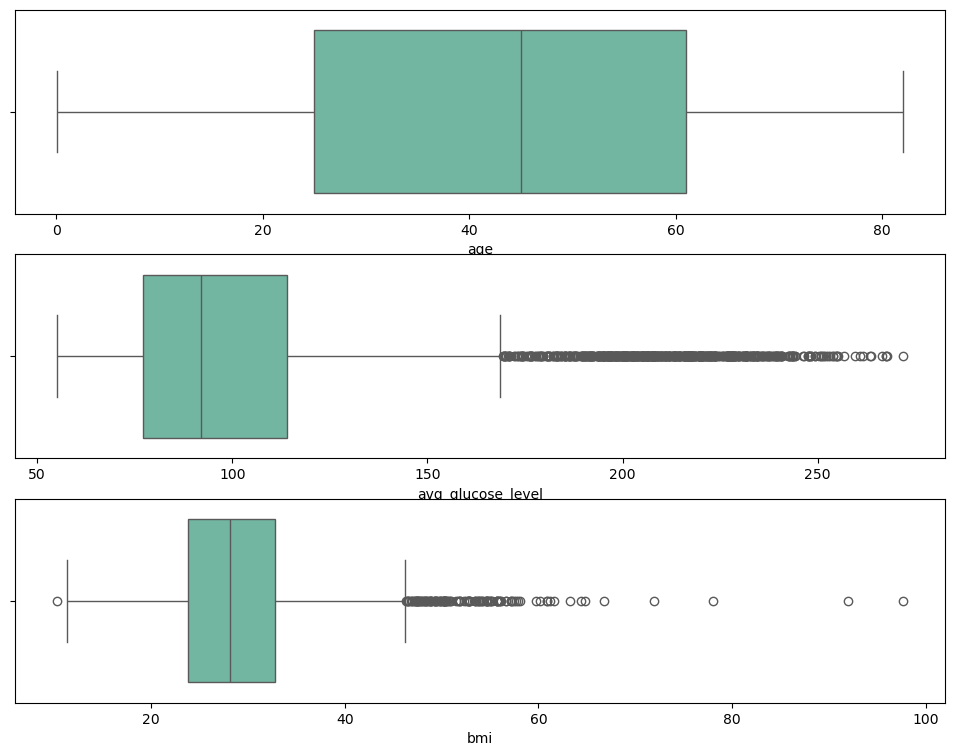

In [20]:
# outliers 
plt.figure(figsize=(12,9))
for i,col in enumerate(df.select_dtypes(float).columns):
    plt.subplot(3,1,i+1)
    sns.boxplot(data=df,x=col,palette =sns.color_palette("Set2"))

There is alot of outliers in bmi and avg glucose level However by searching online most of these values are normal so we just remove enough to be in the acceptable range

In [22]:
df = df[(df["bmi"]<66) & (df["bmi"]>12)]

In [25]:
df = df[(df["avg_glucose_level"]>56) & (df["avg_glucose_level"]<250)]

There's just one subject with 'Other' as gender, so I will remove it. 

In [28]:
df=df.drop(df[df["gender"]=="Other"].index)

In [30]:
df.shape

(5043, 11)

### Univariate and Multivariate Analysis

### 1) Did men report a higher number of strokes compared to women?

- A higher number of strokes was reported for females (140) compared to men (110). However, when comparing the two genders with the number of strokes vs no strokes, this is negligible. Moreover, the number of females in the dataset is generally higher than that of men, thus affecting the number of strokes. 


In [35]:
# Gender distribution
# the dataset has slightly more women than men.
counts_gender = df['gender'].value_counts()
counts_gender

gender
Female    2956
Male      2087
Name: count, dtype: int64

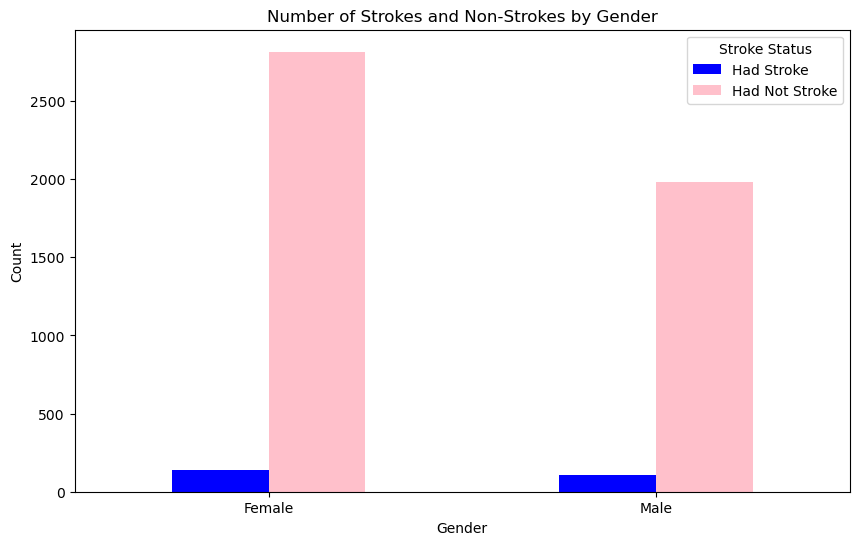

In [37]:
# Group by gender and sum up the number of strokes
stroke_by_gender = df[df['stroke'] == 1].groupby('gender').size()
no_stroke_by_gender = df[df['stroke'] == 0].groupby('gender').size()

# Combine these into a DataFrame for easier plotting
combined_df = pd.DataFrame({
    'Had Stroke': stroke_by_gender,
    'Had Not Stroke': no_stroke_by_gender
}).fillna(0)  # Fill NaN values with 0 for genders with no entries

# Plot the data
combined_df.plot(kind='bar', figsize=(10, 6), color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Strokes and Non-Strokes by Gender')
plt.xticks(rotation=0)  # Rotate x-axis labels to be horizontal
plt.legend(title='Stroke Status')
plt.show()

### 2) Did subjects older than 55 report more strokes compared to younger subjects?

- The column 'age' is balanced.- When isolating subjects who had a stroke, it appears that the rate of stroke increased with age.
- The plot shows that subjects older than 55 had more cases of strokes compared to younger subjects. 

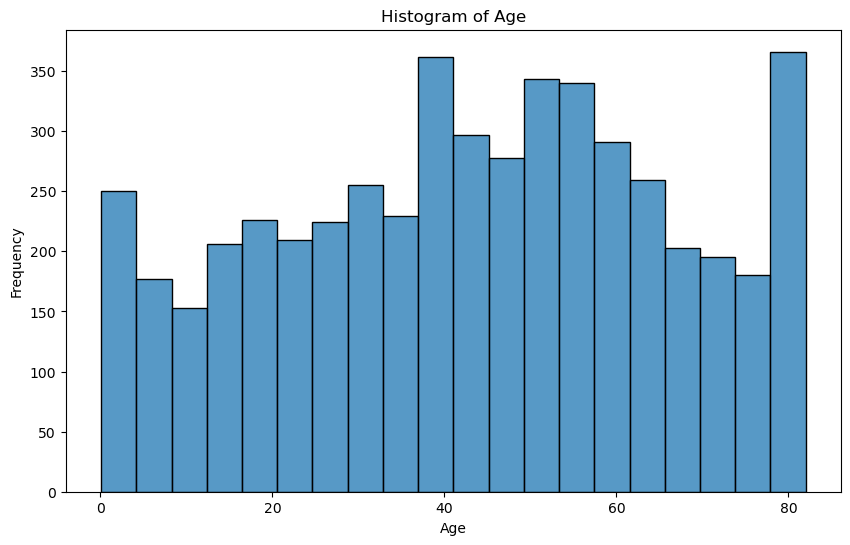

In [41]:
# Distribution of age 
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=False)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\papic\AppData\Local\Temp\ipykernel_9188\2891599080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_df['age_group'] = stroke_df['age'].apply(lambda x: 'Older than 55' if x > 55 else 'Younger than 55')


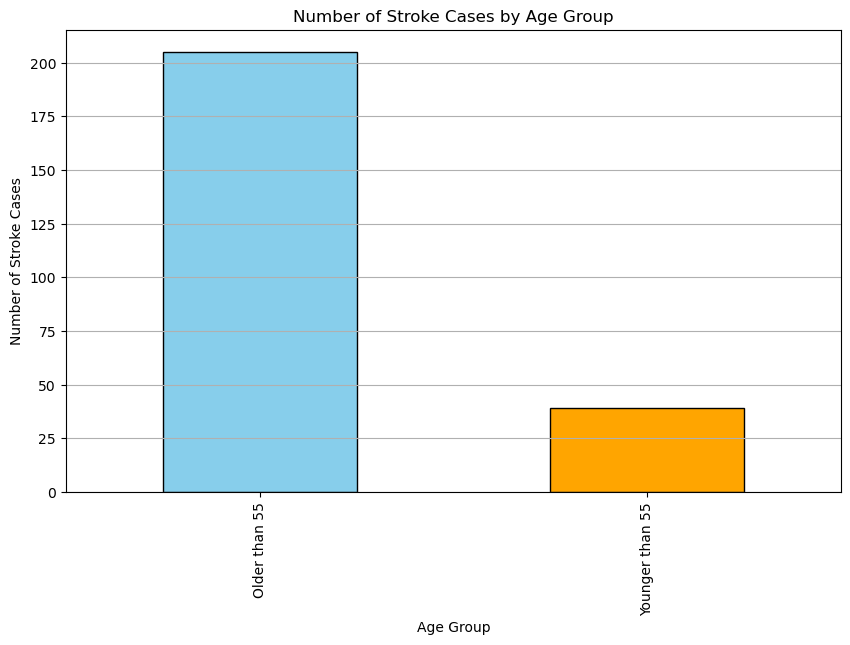

In [42]:
# Filter the DataFrame to include only subjects who had a stroke
stroke_df = df[df['stroke'] == 1]

# Create a new column to categorize age groups
stroke_df['age_group'] = stroke_df['age'].apply(lambda x: 'Older than 55' if x > 55 else 'Younger than 55')

# Count the number of strokes in each age group
age_group_counts = stroke_df['age_group'].value_counts()

# Plot the bar chart of stroke cases by age group
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Number of Stroke Cases')
plt.title('Number of Stroke Cases by Age Group')
plt.grid(axis='y')
plt.show()

#### 3) Did women aged 55 or older have more strokes compared to men aged 55 or older? 

- Yes, women aged 55 or older had more strokes compared to men of the same age bracket. 

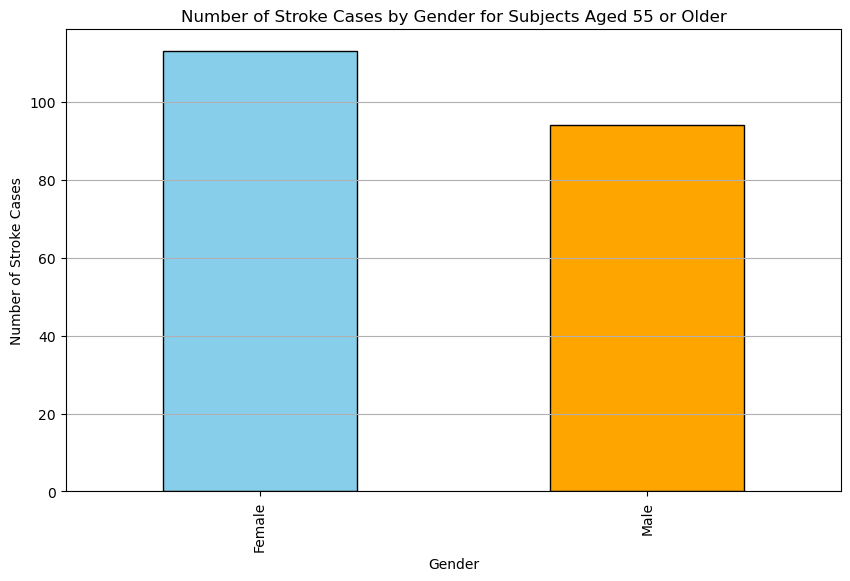

In [47]:
# Filter the DataFrame to include only subjects who had a stroke
stroke_df = df[df['stroke'] == 1]

# Filter the DataFrame further to include only subjects aged 55 or older
stroke_df_55_or_older = stroke_df[stroke_df['age'] >= 55]

# Group by gender and count the number of strokes in each group
gender_counts = stroke_df_55_or_older['gender'].value_counts()

# Plot the bar chart of stroke cases by gender for subjects aged 55 or older
plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Number of Stroke Cases')
plt.title('Number of Stroke Cases by Gender for Subjects Aged 55 or Older')
plt.grid(axis='y')
plt.show()

### 4) How many subjects who had a stroke also had hypertension compared to subjects who had a stroke but no hypertension?
- 90% of the subjects didn't have hypertension while only 10% had hypertension. This makes the dataset unbalanced.
- Only 26.23% of subjects that had a stroke also had hypertension, making it seem as if hypertension wasn't a factor leading to stroke (which is against what the science says).
- When plotting 'Subjects with stroke and hypertension' vs 'Subjects with stroke and no hypertension', it's interesting to see that numbers for people aged 60+ is similar, but we have a greater number of cases for people aged 40-60 who had both cases of strokes with hypertension
- smoking doesn't seem to be linked to hypertension, and if anything non-smokers reported more cases of hypertension compared smokers or ex-smokers.
- When comparing people aged 40-60 who had 'Hypertension, Stroke and Smoker' vs 'Non-hypertension, Stroke and Smoker', numbers of strokes were higher for the second group, indicating that smoking combined with hypertension doesn't increase risk of stroke. 

In [50]:
# Calculate the counts
counts_hypertension = df['hypertension'].value_counts()
# Calculate the percentages
percentages = counts_hypertension / len(df) * 100
print(percentages)

hypertension
0    90.382709
1     9.617291
Name: count, dtype: float64


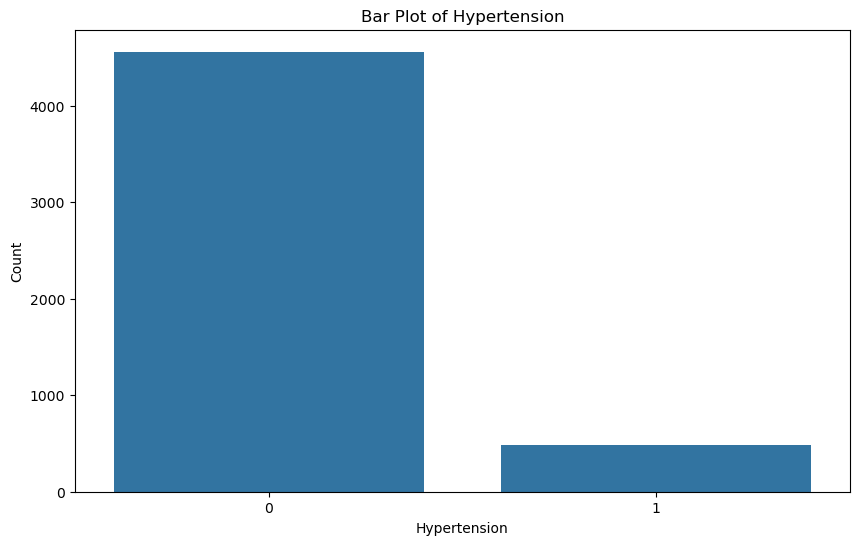

In [52]:
# hypertension 
# Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='hypertension', data=df)
plt.title('Bar Plot of Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

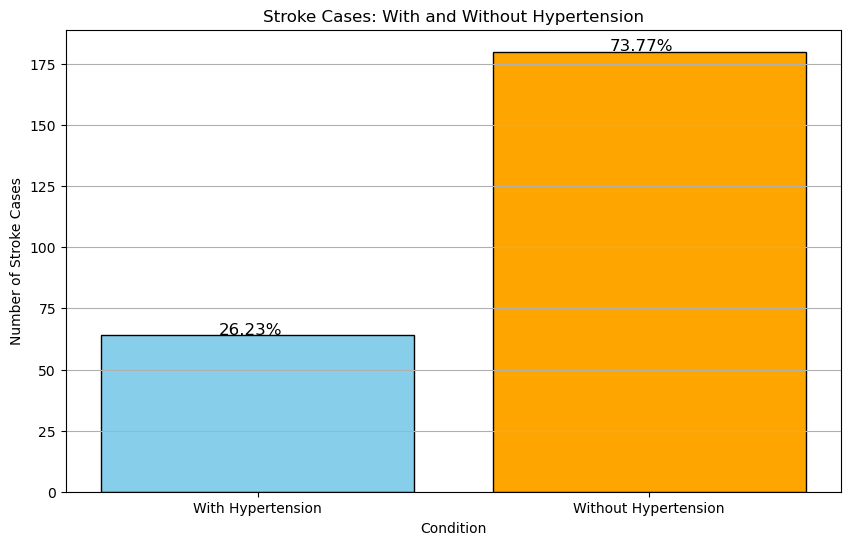

Number of people with hypertension who had a stroke: 64
Number of people without hypertension who had a stroke: 180
Percentage of people with hypertension who had a stroke: 26.23%
Percentage of people without hypertension who had a stroke: 73.77%


In [204]:
# How many people with hypertension had a stroke?
# Filter the DataFrame to include only subjects who had a stroke
stroke_df = df[df['stroke'] == 1]

# Count the number of people who had a stroke and had hypertension
stroke_and_hypertension_count = stroke_df[stroke_df['hypertension'] == 1].shape[0]

# Count the number of people who had a stroke and did not have hypertension
stroke_and_no_hypertension_count = stroke_df[stroke_df['hypertension'] == 0].shape[0]

# Calculate the total number of people who had a stroke
total_stroke_count = stroke_df.shape[0]

# Calculate the percentages
percentage_with_hypertension = (stroke_and_hypertension_count / total_stroke_count) * 100
percentage_without_hypertension = (stroke_and_no_hypertension_count / total_stroke_count) * 100

# Prepare data for plotting
categories = ['With Hypertension', 'Without Hypertension']
counts = [stroke_and_hypertension_count, stroke_and_no_hypertension_count]
percentages = [percentage_with_hypertension, percentage_without_hypertension]

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=['skyblue', 'orange'], edgecolor='black')

# Add percentage annotations on the bars
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.5, f'{percentage:.2f}%', fontsize=12, color='black')

# Add labels and title
plt.xlabel('Condition')
plt.ylabel('Number of Stroke Cases')
plt.title('Stroke Cases: With and Without Hypertension')
plt.grid(axis='y')
plt.show()

# Print the results
print(f"Number of people with hypertension who had a stroke: {stroke_and_hypertension_count}")
print(f"Number of people without hypertension who had a stroke: {stroke_and_no_hypertension_count}")
print(f"Percentage of people with hypertension who had a stroke: {percentage_with_hypertension:.2f}%")
print(f"Percentage of people without hypertension who had a stroke: {percentage_without_hypertension:.2f}%")

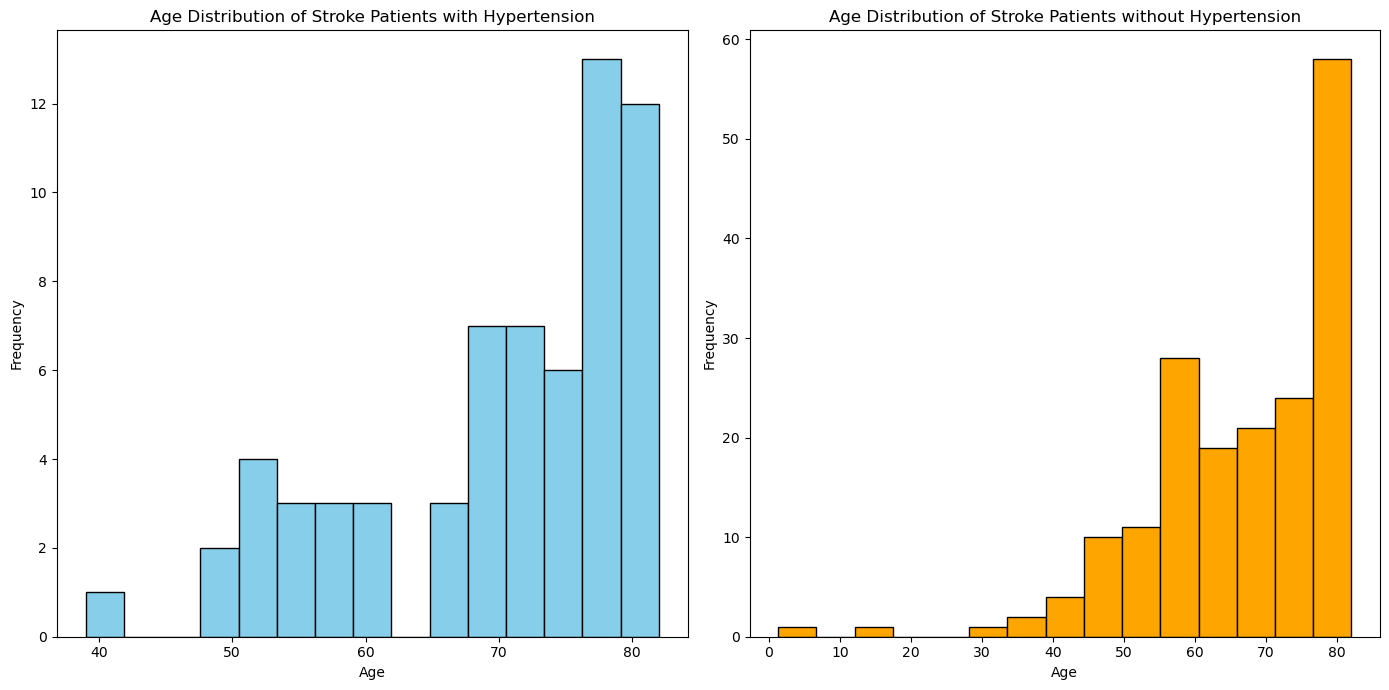

Summary Statistics for Stroke Patients with Hypertension:
count    64.000000
mean     70.078125
std      10.563947
min      39.000000
25%      64.750000
50%      73.000000
75%      78.250000
max      82.000000
Name: age, dtype: float64

Summary Statistics for Stroke Patients without Hypertension:
count    180.000000
mean      66.662889
std       13.390651
min        1.320000
25%       58.000000
50%       69.500000
75%       78.000000
max       82.000000
Name: age, dtype: float64


In [57]:
# Filter the data for individuals who had a stroke
stroke_df = df[df['stroke'] == 1]

# Separate the data into those with hypertension and those without
stroke_with_hypertension = stroke_df[stroke_df['hypertension'] == 1]['age']
stroke_without_hypertension = stroke_df[stroke_df['hypertension'] == 0]['age']

# Calculate summary statistics
summary_with_hypertension = stroke_with_hypertension.describe()
summary_without_hypertension = stroke_without_hypertension.describe()

# Plot histograms for age distributions
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(stroke_with_hypertension, bins=15, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Stroke Patients with Hypertension')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(stroke_without_hypertension, bins=15, color='orange', edgecolor='black')
plt.title('Age Distribution of Stroke Patients without Hypertension')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print summary statistics
print("Summary Statistics for Stroke Patients with Hypertension:")
print(summary_with_hypertension)
print("\nSummary Statistics for Stroke Patients without Hypertension:")
print(summary_without_hypertension)


In [61]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


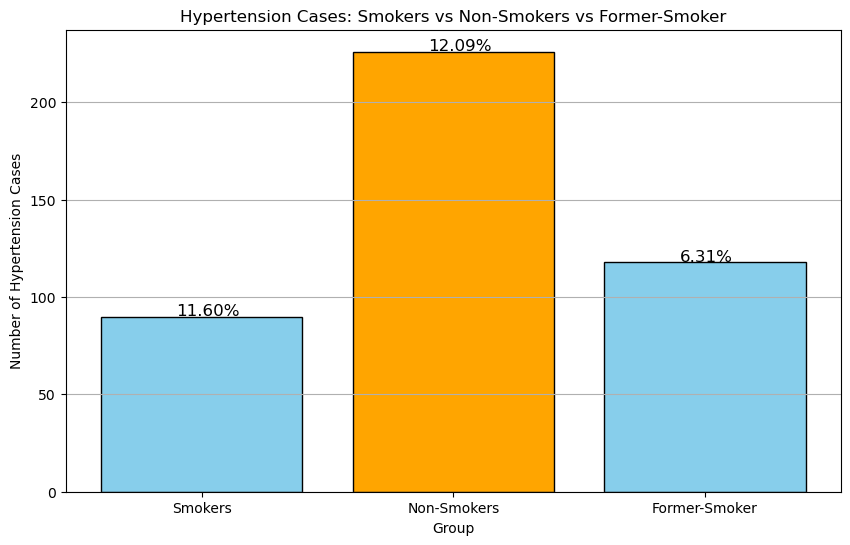

In [69]:
# Did smokers report more cases of hypertension compared to non-smokers? 
# Count the number of smokers and non-smokers with and without hypertension
smokers = df[df['smoking_status'] == 'smokes']
former_smoker = df[df['smoking_status'] == 'formerly smoked']
non_smokers = df[df['smoking_status'] == 'never smoked']

hypertension_smokers = smokers['hypertension'].sum()
hypertension_non_smokers = non_smokers['hypertension'].sum()
hypertension_former_smoker = former_smoker['hypertension'].sum()

total_smokers = smokers.shape[0]
total_non_smokers = non_smokers.shape[0]
total_former_smoker = former_smoked.shape[0]

# Calculate the percentages
percentage_hypertension_smokers = (hypertension_smokers / total_smokers) * 100
percentage_hypertension_non_smokers = (hypertension_non_smokers / total_non_smokers) * 100
percentage_hypertension_former_smokers = (hypertension_former_smoker / total_non_smokers) * 100

# Prepare data for plotting
categories = ['Smokers', 'Non-Smokers', 'Former-Smoker']
counts = [hypertension_smokers, hypertension_non_smokers, hypertension_former_smoker]
percentages = [percentage_hypertension_smokers, percentage_hypertension_non_smokers, percentage_hypertension_former_smokers]

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=['skyblue', 'orange'], edgecolor='black')

# Add percentage annotations on the bars
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.5, f'{percentage:.2f}%', fontsize=12, color='black')

# Add labels and title
plt.xlabel('Group')
plt.ylabel('Number of Hypertension Cases')
plt.title('Hypertension Cases: Smokers vs Non-Smokers vs Former-Smoker')
plt.grid(axis='y')
plt.show()


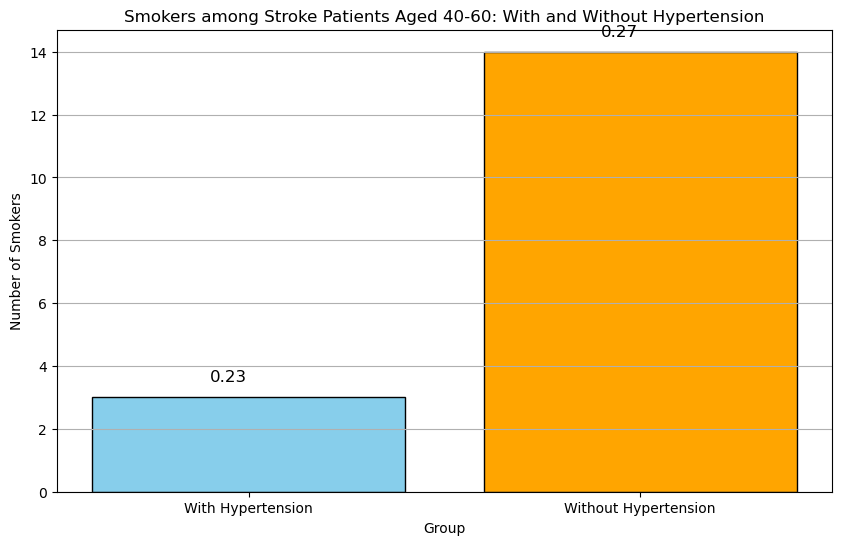

Number of smokers with hypertension: 3
Number of smokers without hypertension: 14
Proportion of smokers with hypertension: 0.23
Proportion of smokers without hypertension: 0.27


In [76]:
# Were people aged 40-60 who had a stroke and hypertension also had more strokes compared to those who had a stroke but not hypertension? 

# Filter for individuals aged 40-60 who had a stroke
age_filtered_df = df[(df['age'] >= 40) & (df['age'] <= 60) & (df['stroke'] == 1)]

# Further split into those with hypertension and those without
with_hypertension = age_filtered_df[age_filtered_df['hypertension'] == 1]
without_hypertension = age_filtered_df[age_filtered_df['hypertension'] == 0]

# Count smokers and non-smokers in each subgroup
smokers_with_hypertension = with_hypertension['smoking_status'].str.contains('smokes').sum()
non_smokers_with_hypertension = with_hypertension.shape[0] - smokers_with_hypertension

smokers_without_hypertension = without_hypertension['smoking_status'].str.contains('smokes').sum()
non_smokers_without_hypertension = without_hypertension.shape[0] - smokers_without_hypertension

# Calculate proportions
proportion_smokers_with_hypertension = smokers_with_hypertension / (smokers_with_hypertension + non_smokers_with_hypertension)
proportion_smokers_without_hypertension = smokers_without_hypertension / (smokers_without_hypertension + non_smokers_without_hypertension)

# Prepare data for plotting
categories = ['With Hypertension', 'Without Hypertension']
smokers_counts = [smokers_with_hypertension, smokers_without_hypertension]
proportions = [proportion_smokers_with_hypertension, proportion_smokers_without_hypertension]

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, smokers_counts, color=['skyblue', 'orange'], edgecolor='black')

# Add proportion annotations on the bars
for bar, proportion in zip(bars, proportions):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.5, f'{proportion:.2f}', fontsize=12, color='black')

# Add labels and title
plt.xlabel('Group')
plt.ylabel('Number of Smokers')
plt.title('Smokers among Stroke Patients Aged 40-60: With and Without Hypertension')
plt.grid(axis='y')
plt.show()

# Print the results
print(f"Number of smokers with hypertension: {smokers_with_hypertension}")
print(f"Number of smokers without hypertension: {smokers_without_hypertension}")
print(f"Proportion of smokers with hypertension: {proportion_smokers_with_hypertension:.2f}")
print(f"Proportion of smokers without hypertension: {proportion_smokers_without_hypertension:.2f}")


### 5) Did Subjects with Heart Disease report more cases of Stroke?
- 95% of subjects didn't have heart disease against 5%, making the dataset unbalanced.
- Overall, most people with heart disease didn't have a stroke. 

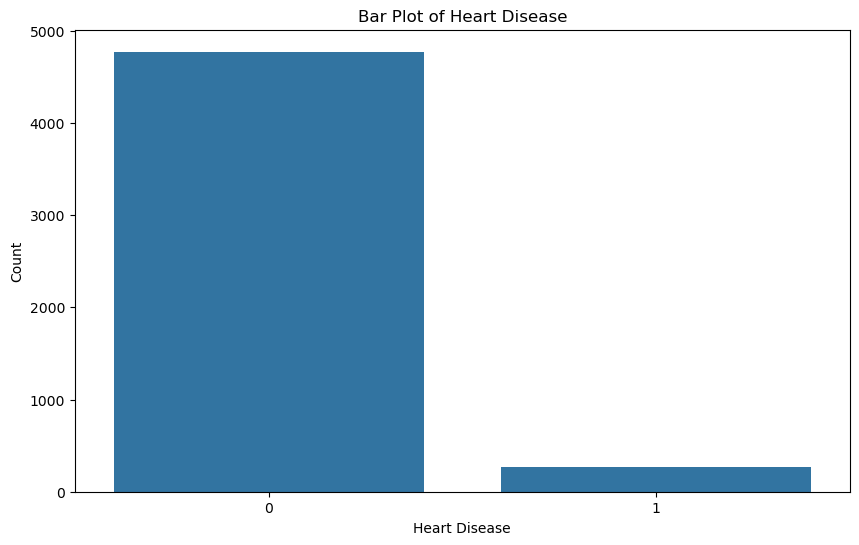

In [98]:
# heart disease 
# Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='heart_disease', data=df)
plt.title('Bar Plot of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

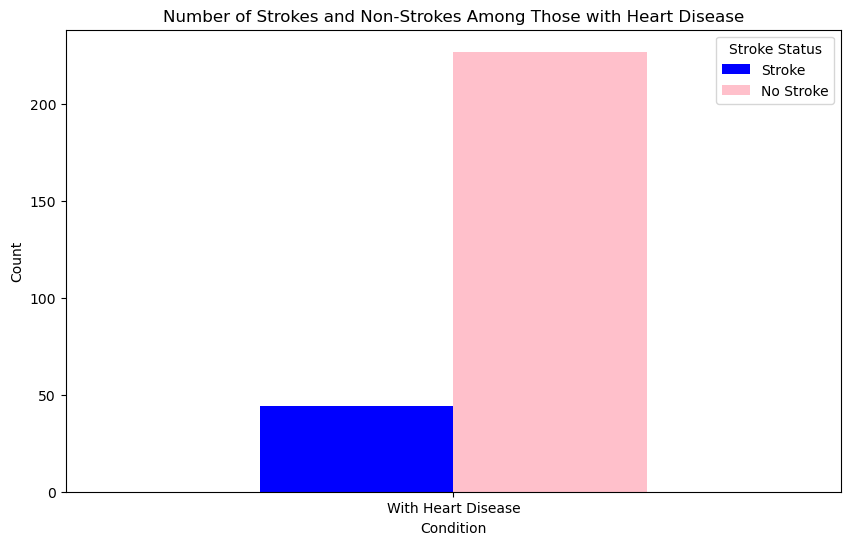

In [100]:
# Filter the DataFrame to include only subjects with both stroke and hypertension
# Filter the DataFrame to include only subjects with heart disease
heart_disease_df = df[df['heart_disease'] == 1]

# Count the number of strokes and non-strokes for those with heart disease
heart_disease_stroke_count = heart_disease_df[heart_disease_df['stroke'] == 1].shape[0]
heart_disease_no_stroke_count = heart_disease_df[heart_disease_df['stroke'] == 0].shape[0]

# Combine these counts into a DataFrame
combined_df = pd.DataFrame({
    'Stroke': [heart_disease_stroke_count],
    'No Stroke': [heart_disease_no_stroke_count]
}, index=['With Heart Disease'])

# Plot the data
combined_df.plot(kind='bar', figsize=(10, 6), color=['blue', 'pink'])
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Number of Strokes and Non-Strokes Among Those with Heart Disease')
plt.xticks(rotation=0)  # Rotate x-axis labels to be horizontal
plt.legend(title='Stroke Status')
plt.show()



### 6) Is there a link between Glucose Levels and levels of Stroke? 
Fasting Blood Glucose Levels (no caloric intake for at least 8 hours) 
- Hypoglycemia: <70 mg/dL 
- Normal: 70-99 mg/dL 
- Prediabetes: 100-125 mg/dL 
- Diabetes: 126 mg/dL or higher on two separate tests


### Findings: 
1) Those with Diabetes (126mg/dL or higher) had more cases of stroke compared to all other groups.
2) Those with diabetes also display a higher mean age (approx 50) compared to the other groups. 

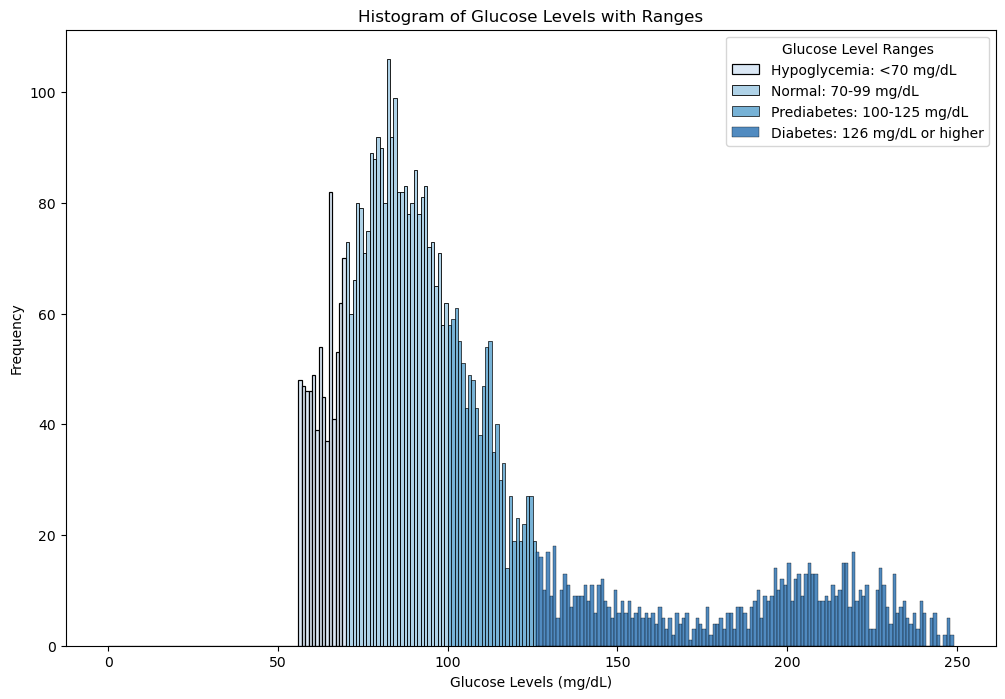

In [80]:
# Convert the 'Glucose' column from float to integer
df['avg_glucose_level'] = df['avg_glucose_level'].astype(int)

# Define the ranges and corresponding colors
ranges = [0, 70, 100, 126, df['avg_glucose_level'].max()]
labels = ['Hypoglycemia: <70 mg/dL', 'Normal: 70-99 mg/dL', 'Prediabetes: 100-125 mg/dL', 'Diabetes: 126 mg/dL or higher']

# Define the base color and create shades
base_color = 'blue'
colors = sns.color_palette("Blues", len(ranges) - 1)

# Plot the histogram with different shades for each range
plt.figure(figsize=(12, 8))

# Iterate over each range and plot them
for i in range(len(ranges) - 1):
    subset = df[(df['avg_glucose_level'] >= ranges[i]) & (df['avg_glucose_level'] < ranges[i + 1])]['avg_glucose_level']
    sns.histplot(subset, bins=range(ranges[i], ranges[i + 1] + 1), color=colors[i], label=labels[i], kde=False)

# Add title and labels
plt.title('Histogram of Glucose Levels with Ranges')
plt.xlabel('Glucose Levels (mg/dL)')
plt.ylabel('Frequency')

# Add legend
plt.legend(title='Glucose Level Ranges')

# Show the plot
plt.show()

In [82]:
# Calculate the counts and percentages for each range
counts = []
percentages = []
total_count = len(df)

for i in range(len(ranges) - 1):
    count = df[(df['avg_glucose_level'] >= ranges[i]) & (df['avg_glucose_level'] < ranges[i + 1])].shape[0]
    percentage = (count / total_count) * 100
    counts.append(count)
    percentages.append(percentage)

# Display the results
result_df = pd.DataFrame({
    'Range': labels,
    'Count': counts,
    'Percentage': percentages
})

print(result_df)

                           Range  Count  Percentage
0        Hypoglycemia: <70 mg/dL    719   14.257386
1            Normal: 70-99 mg/dL   2374   47.075154
2     Prediabetes: 100-125 mg/dL    996   19.750149
3  Diabetes: 126 mg/dL or higher    952   18.877652


C:\Users\papic\AppData\Local\Temp\ipykernel_9188\1425114844.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Range', y='Stroke Rate', data=rate_df, palette='Blues')


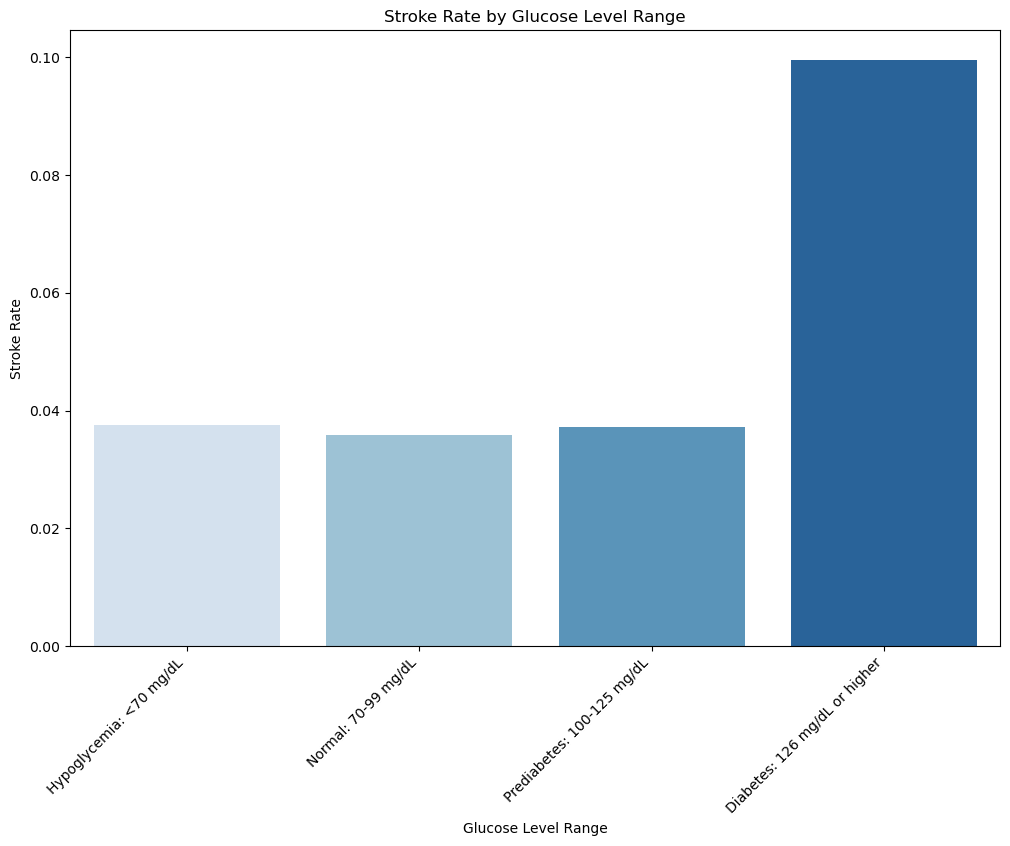

In [84]:
# Convert the 'avg_glucose_level' column from float to integer
df['avg_glucose_level'] = df['avg_glucose_level'].astype(int)

# Define the ranges and corresponding labels
ranges = [0, 70, 100, 126, df['avg_glucose_level'].max() + 1]
labels = ['Hypoglycemia: <70 mg/dL', 'Normal: 70-99 mg/dL', 'Prediabetes: 100-125 mg/dL', 'Diabetes: 126 mg/dL or higher']

# Initialize lists to store stroke rates and counts
stroke_rates = []
counts = []

# Iterate over each range to calculate stroke rates
for i in range(len(ranges) - 1):
    subset = df[(df['avg_glucose_level'] >= ranges[i]) & (df['avg_glucose_level'] < ranges[i + 1])]
    stroke_count = subset['stroke'].sum()
    total_count = len(subset)
    stroke_rate = stroke_count / total_count if total_count > 0 else 0
    stroke_rates.append(stroke_rate)
    counts.append(total_count)

# Create a DataFrame for plotting
rate_df = pd.DataFrame({
    'Range': labels,
    'Stroke Rate': stroke_rates,
    'Count': counts
})

# Plot the stroke rates
plt.figure(figsize=(12, 8))
sns.barplot(x='Range', y='Stroke Rate', data=rate_df, palette='Blues')
plt.xlabel('Glucose Level Range')
plt.ylabel('Stroke Rate')
plt.title('Stroke Rate by Glucose Level Range')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\papic\AppData\Local\Temp\ipykernel_11100\1549983864.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Range', y='Average Age', data=age_df, palette='viridis')


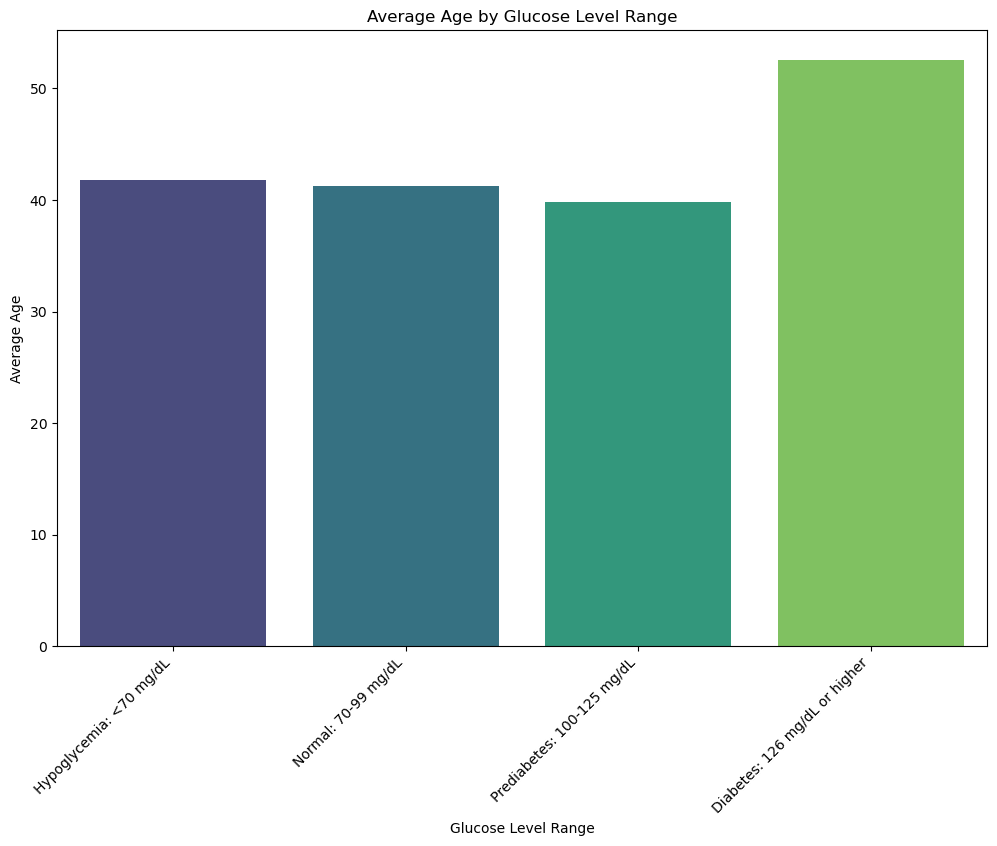

In [44]:
# Define the ranges and corresponding labels
ranges = [0, 70, 100, 126, df['avg_glucose_level'].max() + 1]
labels = ['Hypoglycemia: <70 mg/dL', 'Normal: 70-99 mg/dL', 'Prediabetes: 100-125 mg/dL', 'Diabetes: 126 mg/dL or higher']

# Initialize lists to store average ages and counts
average_ages = []

# Iterate over each range to calculate average ages
for i in range(len(ranges) - 1):
    subset = df[(df['avg_glucose_level'] >= ranges[i]) & (df['avg_glucose_level'] < ranges[i + 1])]
    average_age = subset['age'].mean()
    average_ages.append(average_age)

# Create a DataFrame for plotting
age_df = pd.DataFrame({
    'Range': labels,
    'Average Age': average_ages
})

# Plot the average ages
plt.figure(figsize=(12, 8))
sns.barplot(x='Range', y='Average Age', data=age_df, palette='viridis')
plt.xlabel('Glucose Level Range')
plt.ylabel('Average Age')
plt.title('Average Age by Glucose Level Range')
plt.xticks(rotation=45, ha='right')
plt.show()

The graph above shows that those with glucose levels < 126 had also a higher mean age. This means that with age people are more likely to have higher levels of glucose, resulting in higher cases of stroke. 


### 7) Did BMI have an impact on number of cases of Stroke? 
Underweight: BMI: < 18.5 Interpretation: Possible insufficient weight; may indicate malnutrition or health issues.


Normal Weight: BMI: 18.5 - 24.9 Interpretation: Healthy weight range; appropriate for heigh
  


Overweight: BMI: 25 - 29.9 Interpretation: Higher weight relative to heig
ht; increased risk of health iss
  
s.

Obesity: BMI: ≥ 30 Interpretation: Significantly higher we
ight; associated with increased risk of se  rious health condi
  
ons.

Most subjects are in the bracket of overwight or

### Findings: 
1) Subject in the 'overweight' bracket reported more cases of stroke, followed by 'obese',
   implying that higher levels of BMI increase chances of having a stroke.

 obese.

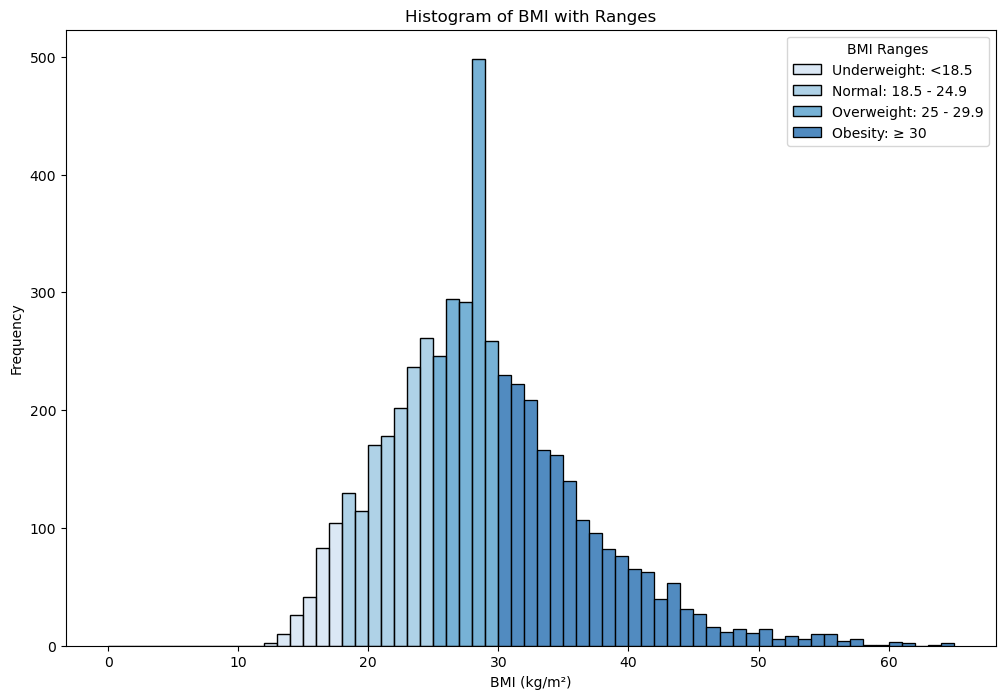

In [89]:
# Convert bmi from float to integer first
df['bmi'] = df['bmi'].astype(int)

# Define the ranges and corresponding colors
ranges = [0, 18, 25, 30, df['bmi'].max() + 1]  # Add 1 to include the maximum value
labels = ['Underweight: <18.5', 'Normal: 18.5 - 24.9', 'Overweight: 25 - 29.9', 'Obesity: ≥ 30']

# Define the base color and create shades
base_color = 'blue'
colors = sns.color_palette("Blues", len(ranges) - 1)

# Plot the histogram with different shades for each range
plt.figure(figsize=(12, 8))

# Iterate over each range and plot them
for i in range(len(ranges) - 1):
    subset = df[(df['bmi'] >= ranges[i]) & (df['bmi'] < ranges[i + 1])]
    sns.histplot(subset['bmi'], bins=range(ranges[i], ranges[i + 1] + 1), color=colors[i], label=labels[i], kde=False)

# Add title and labels
plt.title('Histogram of BMI with Ranges')
plt.xlabel('BMI (kg/m²)')
plt.ylabel('Frequency')

# Add legend
plt.legend(title='BMI Ranges')

# Show the plot
plt.show()

### The graph shows a Normal Distribution

In [91]:
# Calculate the counts and percentages for each range
counts = []
percentages = []
total_count = len(df)

for i in range(len(ranges) - 1):
    count = df[(df['bmi'] >= ranges[i]) & (df['bmi'] < ranges[i + 1])].shape[0]
    percentage = (count / total_count) * 100
    counts.append(count)
    percentages.append(percentage)

# Display the results
result_df = pd.DataFrame({
    'Range': labels,
    'Count': counts,
    'Percentage': percentages
})

print(result_df)

                   Range  Count  Percentage
0     Underweight: <18.5    266    5.274638
1    Normal: 18.5 - 24.9   1292   25.619671
2  Overweight: 25 - 29.9   1589   31.509022
3          Obesity: ≥ 30   1896   37.596669


C:\Users\papic\AppData\Local\Temp\ipykernel_11100\2335488091.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Range', y='Mean Stroke Rate', data=bmi_df, palette='viridis')


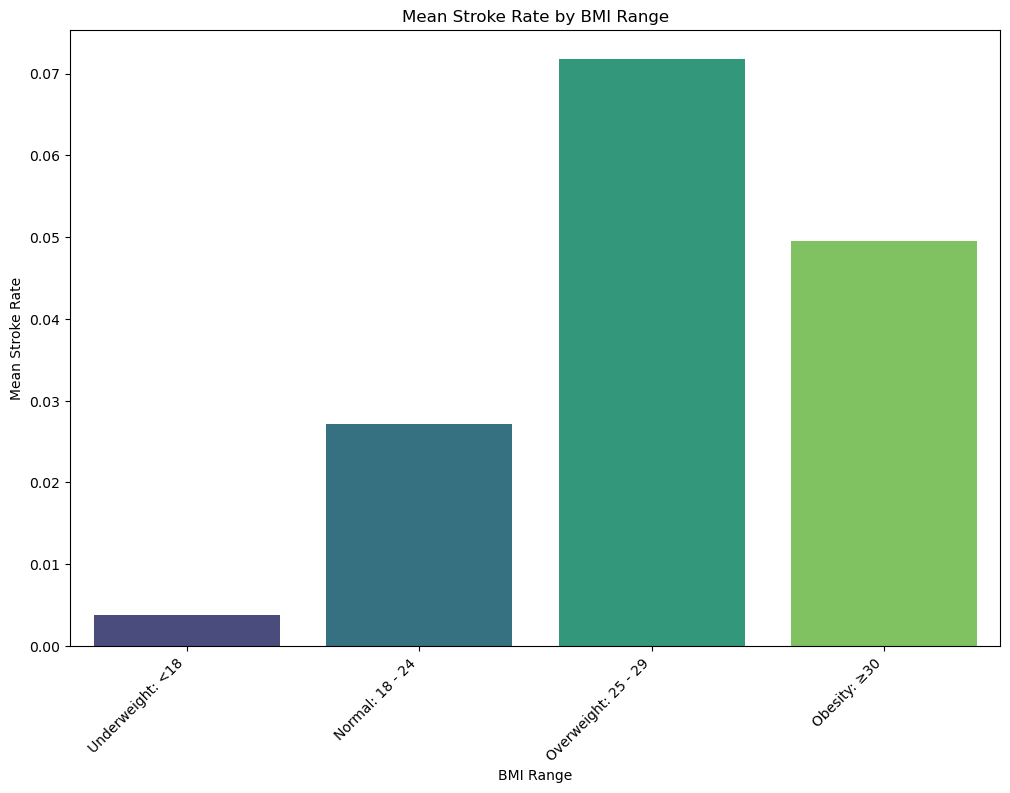

In [51]:
# Initialize lists to store mean stroke rates
# Define the ranges and corresponding labels
bmi_ranges = [0, 18, 25, 30, df['bmi'].max() + 1]
labels = ['Underweight: <18', 'Normal: 18 - 24', 'Overweight: 25 - 29', 'Obesity: ≥30']

mean_stroke_rates = []

# Iterate over each range to calculate mean stroke rates
for i in range(len(bmi_ranges) - 1):
    subset = df[(df['bmi'] >= bmi_ranges[i]) & (df['bmi'] < bmi_ranges[i + 1])]
    mean_stroke_rate = subset['stroke'].mean()
    mean_stroke_rates.append(mean_stroke_rate)

# Create a DataFrame for plotting
bmi_df = pd.DataFrame({
    'Range': labels,
    'Mean Stroke Rate': mean_stroke_rates
})

# Plot the mean stroke rates
plt.figure(figsize=(12, 8))
sns.barplot(x='Range', y='Mean Stroke Rate', data=bmi_df, palette='viridis')
plt.xlabel('BMI Range')
plt.ylabel('Mean Stroke Rate')
plt.title('Mean Stroke Rate by BMI Range')
plt.xticks(rotation=45, ha='right')
plt.show()

The bar chart above shows that people with a BMI considered to be in the 'Overweight' range, had the highest mean stroke rate (0.07), followed by 'Obesity' range (0.05). Those 'Underweight' and 'Normal' had far less cases. This indicates that higher levels of BMI are linked to a higher change of stroke. 

#### 8) Analysis of 'Smoking Status'

1) Most people identified as 'non smokers', followed by 'Unknown'
2) Smoking doesn't seem to be linked to stroke

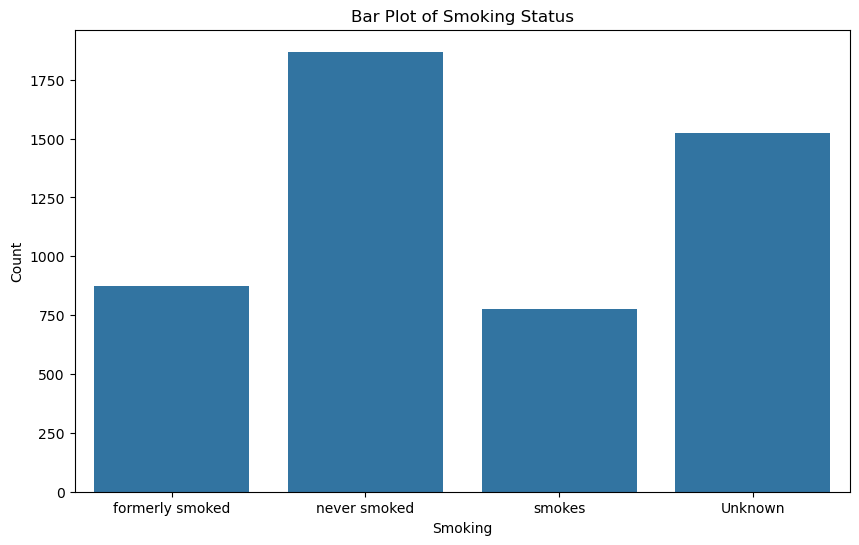

In [106]:
# Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_status', data=df)
plt.title('Bar Plot of Smoking Status')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()

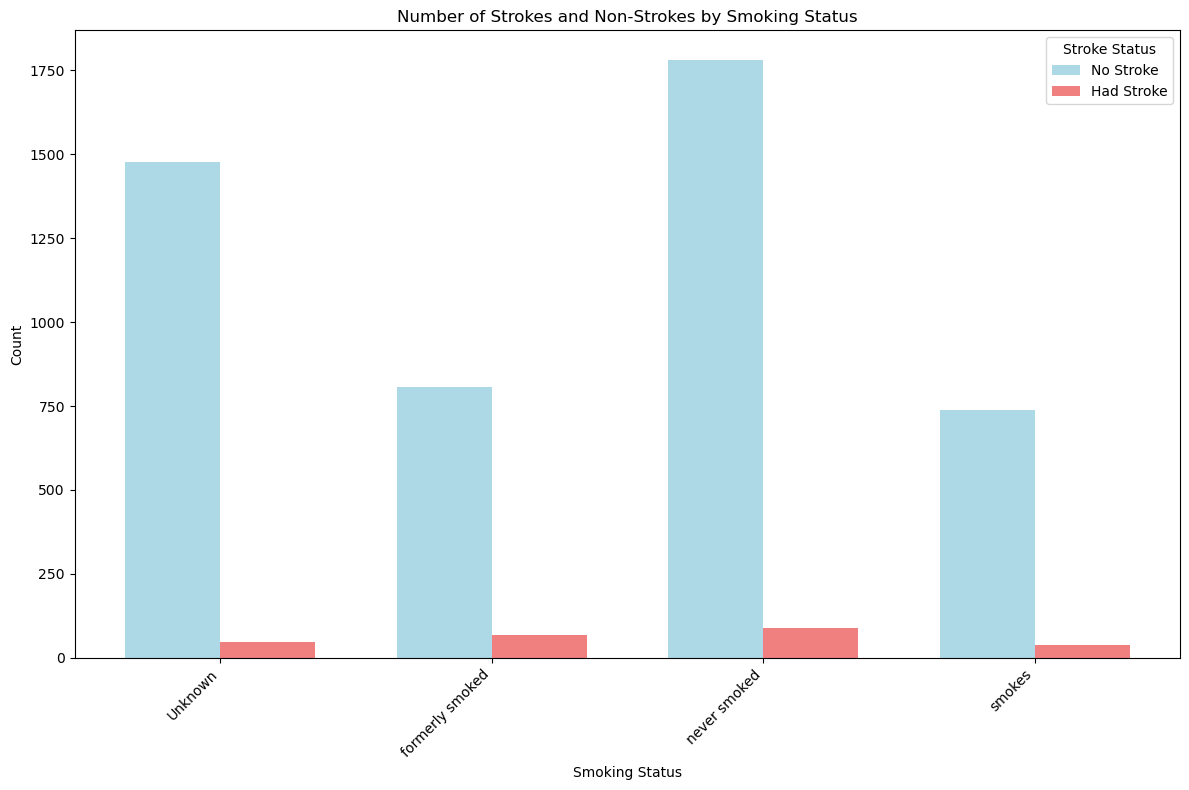

In [55]:
# Calculate the counts of strokes and non-strokes for each smoking status
counts = df.groupby(['smoking_status', 'stroke']).size().unstack(fill_value=0)

# Reset index to prepare for plotting
counts = counts.reset_index()
counts.columns = ['Smoking Status', 'No Stroke', 'Had Stroke']

# Plot the data
plt.figure(figsize=(12, 8))

# Plot bars for each smoking status
bar_width = 0.35
index = range(len(counts))

plt.bar(index, counts['No Stroke'], bar_width, label='No Stroke', color='lightblue')
plt.bar([i + bar_width for i in index], counts['Had Stroke'], bar_width, label='Had Stroke', color='lightcoral')

plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Number of Strokes and Non-Strokes by Smoking Status')
plt.xticks([i + bar_width / 2 for i in index], counts['Smoking Status'], rotation=45, ha='right')
plt.legend(title='Stroke Status')

plt.tight_layout()
plt.show()

The bar chart above shows that the cases of stroke is relatively low across the different scenarios for the variable 'smoking status'. 

#### 9) Did 'Work Type' have an effect on Stroke? 
1) Most people reported working in the 'private sector', making the data unbalanced
2) People working in the 'private sector' reported higher cases of stroke, however this might be due to more subjects working in that sector
3) Those working in 'Children' related jobs, reported almost inexistent cases of stroke. 

In [110]:
counts_work_type = df['work_type'].value_counts()
counts_work_type

work_type
Private          2888
Self-employed     808
children          678
Govt_job          647
Never_worked       22
Name: count, dtype: int64

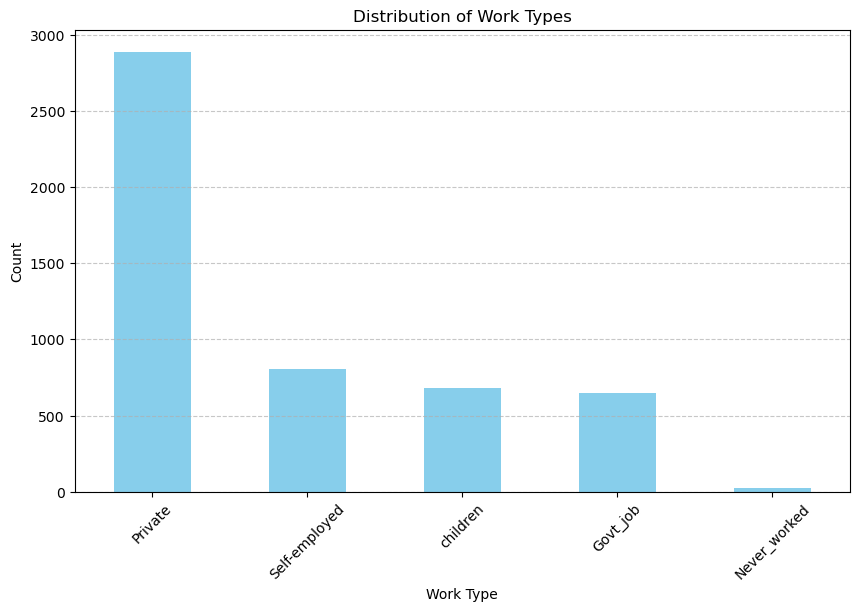

In [61]:
plt.figure(figsize=(10, 6))
counts_work_type.plot(kind='bar', color='skyblue')
plt.title('Distribution of Work Types')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Most people worked in the Private sector. 

C:\Users\papic\AppData\Local\Temp\ipykernel_11100\3680194546.py:1: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.countplot(df,x="stroke",hue="work_type",palette =sns.color_palette("Set2"))


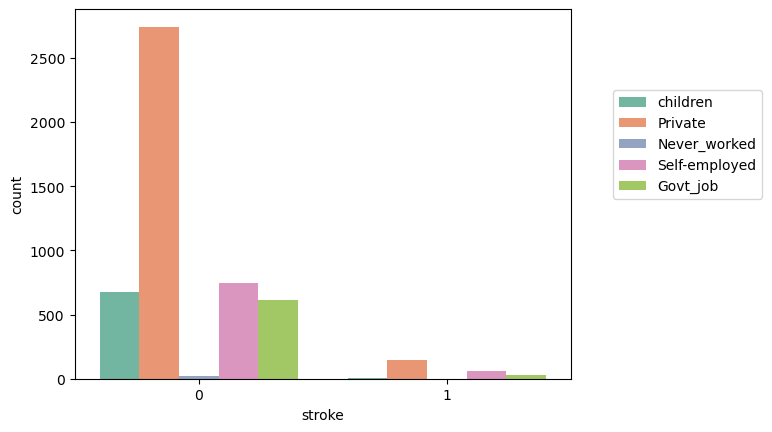

In [63]:
sns.countplot(df,x="stroke",hue="work_type",palette =sns.color_palette("Set2"))
plt.legend(bbox_to_anchor =(1.4,0.8))

Stroke happened more in the Private sector, however most subjects worked in the private sector regardless of stroke. 

## Predictive Models: Logistic Regression and Decision Tree 

In [153]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.utils import resample

### Unsampling
In my analysis of a dataset aimed at predicting stroke, I observed a significant class imbalance, with 95% of the subjects not experiencing a stroke. To address this imbalance, I employed undersampling, which involves reducing the number of non-stroke cases to match the number of stroke cases. This technique helps to prevent the model from becoming biased towards the majority class, ensuring that it does not simply predict the dominant class (no stroke) most of the time. By creating a more balanced dataset, undersampling improves the model’s ability to accurately learn and predict the minority class (stroke), leading to better overall performance and more reliable predictions.


In [156]:
had_stroke = df[df["stroke"]==1]
no_stroke = df[df["stroke"]==0]
upsampled_had_stroke = resample(had_stroke,replace=True , n_samples=no_stroke.shape[0] , random_state=123 )
upsampled_data = pd.concat([no_stroke,upsampled_had_stroke])

<Axes: ylabel='count'>

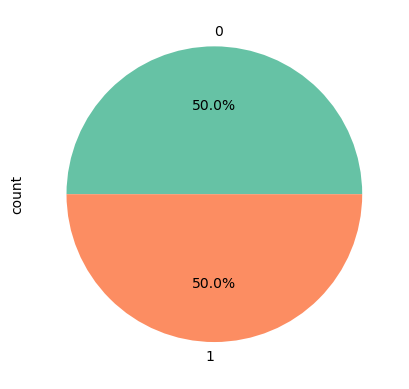

In [158]:
upsampled_data.stroke.value_counts().plot(kind = "pie",autopct="%0.1f%%",colors =sns.color_palette("Set2"))

### Encoding Nominal Data 
In my analysis of the stroke prediction dataset, I used encoding for nominal data to convert categorical variables into a numerical format suitable for machine learning algorithms. Specifically, I focused on columns such as 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', and 'smoking_status'. By applying the pd.get_dummies function to these columns, I created dummy variables, converting each category into a separate binary column. This process enabled the model to process categorical information effectively. I then concatenated these dummy variables with the original dataset, replacing the original categorical columns. This transformation was essential to ensure that the machine learning model could interpret and utilize the categorical data accurately, thereby improving its predictive performance.

In [184]:
cols = ['gender','heart_disease', 'ever_married', 'work_type', 'Residence_type','smoking_status']
dums = pd.get_dummies(upsampled_data[cols],dtype=int)
model_data = pd.concat([upsampled_data,dums],axis=1).drop(columns=cols)

In [186]:
model_data.head()

,age,hypertension,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
249,3.0,0,95,18,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0
250,58.0,1,87,39,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
251,8.0,0,110,17,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0
252,70.0,0,69,35,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
253,14.0,0,161,19,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0


#### Normalizing data
In my analysis of the stroke prediction dataset, I applied normalization to ensure that the numerical features were on a similar scale, which is crucial for many machine learning algorithms. Specifically, I used the MinMaxScaler to normalize the 'age', 'avg_glucose_level', and 'bmi' columns. This scaler transforms the data by scaling each feature to a given range, typically between 0 and 1. By fitting the scaler to each of these columns and then transforming the data, I ensured that these features had a consistent scale. This normalization step helps to improve the convergence of gradient-based algorithms and ensures that the model treats all features equally, thereby enhancing its predictive performance.

In [188]:
scaler = MinMaxScaler()
for col in ['age','avg_glucose_level','bmi']:
    scaler.fit(model_data[[col]])
    model_data[col]=scaler.transform(model_data[[col]])

In [190]:
model_data.head()

,age,hypertension,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
249,0.035645,0,0.202073,0.115385,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0
250,0.707031,1,0.160622,0.519231,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
251,0.096680,0,0.279793,0.096154,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0
252,0.853516,0,0.067358,0.442308,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
253,0.169922,0,0.544041,0.134615,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0


### Logistic Regression vs Decision Tree

### Report of Logistic Regression Model
- Specific Findings const (Intercept): -4.3582 (p < 0.001). The negative sign indicates that the baseline log odds of stroke are low without other predictors.
- A
age: 1.6941 (p < 0.001). This coefficient suggests that as age increases, the log odds of having a stroke increase significantly.- H

hypertension: 0.4021 (p = 0.015). Hypertension is positively associated with the likelihood of strok- A.

avg_glucose_level: 0.8650 (p = 0.001). Higher glucose levels are associated with higher log odds of str- Gke.

BMIder, bmi, Residence_type_Urban, work_type_..., smoking_status_...: The coefficients for these predictors are not statistically significant, indicating they may not have a strong effect on stroke likelihood in thi


### Report of Decision Tree Model
Important predictos of Stroke (in order of importance) were:
   - First: Age
   - Second: Glucose Levels
   - Third: BMIs model.

In [192]:
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

Feature Importances:
                           Feature  Importance
0                              age    0.495130
2                avg_glucose_level    0.192554
3                              bmi    0.157059
17     smoking_status_never smoked    0.020926
1                     hypertension    0.017201
18           smoking_status_smokes    0.016187
15          smoking_status_Unknown    0.015569
16  smoking_status_formerly smoked    0.012978
11         work_type_Self-employed    0.011604
5                      gender_Male    0.011372
14            Residence_type_Urban    0.010051
6                  ever_married_No    0.007584
13            Residence_type_Rural    0.007226
8               work_type_Govt_job    0.007180
10               work_type_Private    0.005853
4                    gender_Female    0.005618
7                 ever_married_Yes    0.003357
12              work_type_children    0.002552
9           work_type_Never_worked    0.000000


C:\Users\papic\AppData\Local\Temp\ipykernel_9188\701951470.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


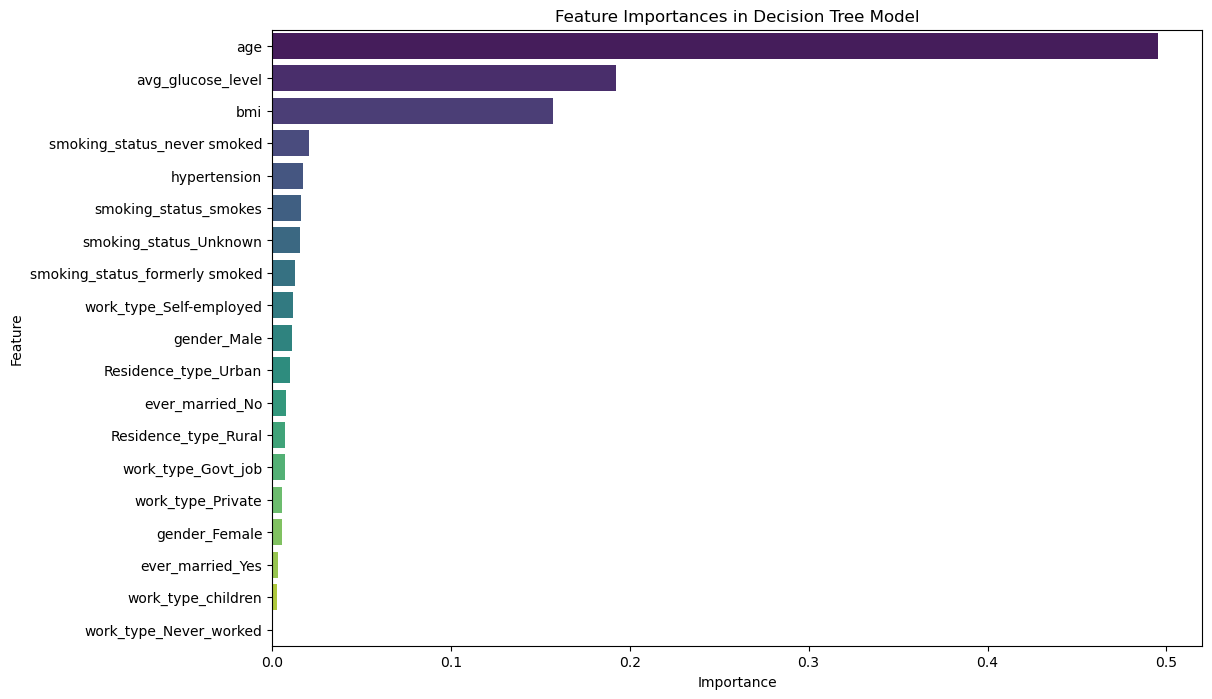

In [194]:
# Assuming model_data is your DataFrame with features and target variable
# Prepare features and target variable
X = model_data.drop(columns=['stroke'])
y = model_data['stroke']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (optional but often useful)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Extract feature importances
importances = tree_model.feature_importances_

# Create a DataFrame to view feature importances
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances in Decision Tree Model')
plt.show()

In [137]:
# Prepare features and target variable
X = model_data.drop(columns=['stroke'])
y = model_data['stroke']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression with regularization
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Hyperparameter tuning using GridSearchCV for Logistic Regression
logistic_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2'],  # Only l2 penalty for the 'lbfgs' solver
    'solver': ['lbfgs']  # Solver that supports l2 penalty
}

logistic_grid_search = GridSearchCV(logistic_model, logistic_param_grid, cv=5, scoring='accuracy')
logistic_grid_search.fit(X_train_scaled, y_train)

# Get the best model from grid search for Logistic Regression
best_logistic_model = logistic_grid_search.best_estimator_

# Predict on the test set with Logistic Regression
y_pred_logistic = best_logistic_model.predict(X_test_scaled)

# Evaluate Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_rep_logistic = classification_report(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Print evaluation results for Logistic Regression
print("Logistic Regression Performance:")
print(f'Accuracy: {accuracy_logistic}')
print('Classification Report:')
print(classification_rep_logistic)
print('Confusion Matrix:')
print(conf_matrix_logistic)

# Initialize Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV for Decision Tree
tree_param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for measuring the quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

tree_grid_search = GridSearchCV(tree_model, tree_param_grid, cv=5, scoring='accuracy')
tree_grid_search.fit(X_train_scaled, y_train)

# Get the best model from grid search for Decision Tree
best_tree_model = tree_grid_search.best_estimator_

# Predict on the test set with Decision Tree
y_pred_tree = best_tree_model.predict(X_test_scaled)

# Evaluate Decision Tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
classification_rep_tree = classification_report(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Print evaluation results for Decision Tree
print("\nDecision Tree Performance:")
print(f'Accuracy: {accuracy_tree}')
print('Classification Report:')
print(classification_rep_tree)
print('Confusion Matrix:')
print(conf_matrix_tree)

Logistic Regression Performance:
Accuracy: 0.7697916666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.71      0.76      1452
           1       0.74      0.83      0.78      1428

    accuracy                           0.77      2880
   macro avg       0.77      0.77      0.77      2880
weighted avg       0.77      0.77      0.77      2880

Confusion Matrix:
[[1035  417]
 [ 246 1182]]

Decision Tree Performance:
Accuracy: 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1452
           1       0.94      1.00      0.97      1428

    accuracy                           0.97      2880
   macro avg       0.97      0.97      0.97      2880
weighted avg       0.97      0.97      0.97      2880

Confusion Matrix:
[[1356   96]
 [   0 1428]]


#### Comments on Models Performance
The Decision Tree classifier outperforms the Logistic Regression model in all key performance metrics: accuracy, precision, recall, and F1-score. The Decision Tree's near-perfect classification suggests it is better suited for this specific dataset and problem. However, Decision Trees can be prone to overfitting, especially with complex datasets, so it might be beneficial to evaluate its performance further or consider other techniques like cross-validation to ensure robustness.

### Conclusion

In conclusion, the data analysis reveals several critical insights regarding stroke prediction and associated factors. While more strokes were reported among females, this finding is influenced by the higher number of females in the dataset, making the gender difference in stroke incidence negligible. Age emerged as a significant factor, with subjects older than 55 reporting more strokes. Women in this age group had more strokes compared to their male counterparts.

Hypertension, though traditionally linked to stroke risk, appeared less influential in this dataset, as only a small percentage of stroke patients had hypertension. This discrepancy may be due to the unbalanced nature of the dataset. Similarly, heart disease was not strongly associated with stroke incidence, further emphasizing the need for a balanced dataset for accurate analysis.

Glucose levels, particularly those indicating diabetes, were significantly associated with stroke, with diabetic individuals displaying a higher incidence of stroke. BMI also played a role, with higher stroke rates observed in overweight and obese individuals, suggesting that elevated BMI increases stroke risk.

Smoking status and work type showed less clear connections to stroke, with the majority of strokes reported by non-smokers and those working in the private sector, likely due to the higher representation of these groups in the dataset.

In predictive modeling, the Decision Tree classifier outperformed the Logistic Regression model across all key metrics, highlighting its suitability for this dataset. However, caution is warranted due to the potential for overfitting, necessitating further evaluation and potential use of techniques like cross-validation to ensure the model's robustness.

Overall, the analysis underscores the importance of age, glucose levels, and BMI in stroke prediction, while also highlighting the complexities and limitations inherent in the dataset.